In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn

from generator import *

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

trainset = torchvision.datasets.CIFAR10(root='../data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='../data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
from tqdm import tqdm
model = ResNet(input_nc=3, output_nc=3, fm=64, n_blocks=6)
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

device = 'cuda'


In [4]:
%%time
model.to(device)
print('model loaded')

model loaded
Wall time: 1.38 s


In [5]:
loader = tqdm(trainloader)
losses = []
pred_imgs = []
img = testset[1][0].unsqueeze(0).to(device)

for idx, batch in enumerate(loader):
    imgs = batch[0].to(device)
    preds = model(imgs)

    optimizer.zero_grad()
    loss = loss_fn(preds, imgs)
    loss.backward()
    optimizer.step()
    losses.append(loss.detach().item())
    
    if (idx + 1) % 100 == 0:
        with torch.no_grad():
            pred_imgs.append(model(img))
        loader.set_description(f"Loss: {round(sum(losses) / len(losses), 5)}")


Loss: 0.15357: 100%|███████████████████████████████████████████████████████████████| 1563/1563 [00:41<00:00, 37.23it/s]


In [15]:
model = model.to('cpu')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


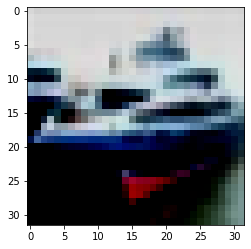

In [16]:
import matplotlib.pyplot as plt

img = testset[1][0]
plt.imshow(img.permute(1, 2, 0))

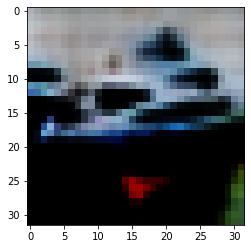

In [17]:
pred = model(img.to('cpu').unsqueeze(0))
plt.imshow(pred.squeeze(0).detach().permute(1, 2, 0))

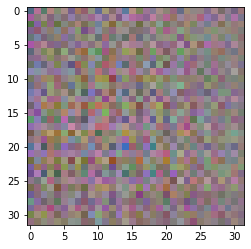

In [18]:
raw_model = ResNet(3, 3, 64, 6)
pred = raw_model(img.unsqueeze(0))
plt.imshow(pred.squeeze(0).detach().permute(1, 2, 0))

<Figure size 5760x5760 with 0 Axes>

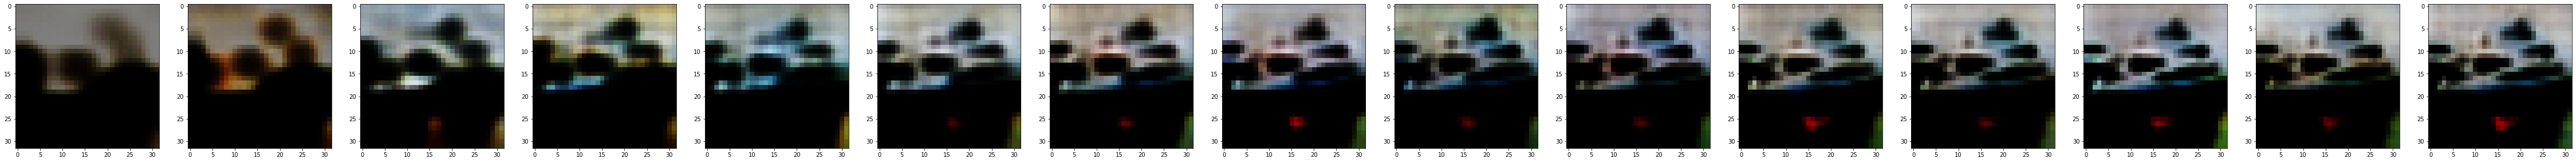

In [25]:
plt.rcParams["figure.figsize"]=80, 80

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, len(pred_imgs)) 

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
for i in range(len(pred_imgs)):
    axarr[i].imshow(pred_imgs[i].cpu().squeeze(0).permute(1, 2, 0))